In [1]:
from sklearn.datasets import make_blobs
# centers=2 (2 class), cluster_std 클러스터의 표준편차
X, y = make_blobs(n_samples=100, centers=2, cluster_std=3.5,random_state=0)

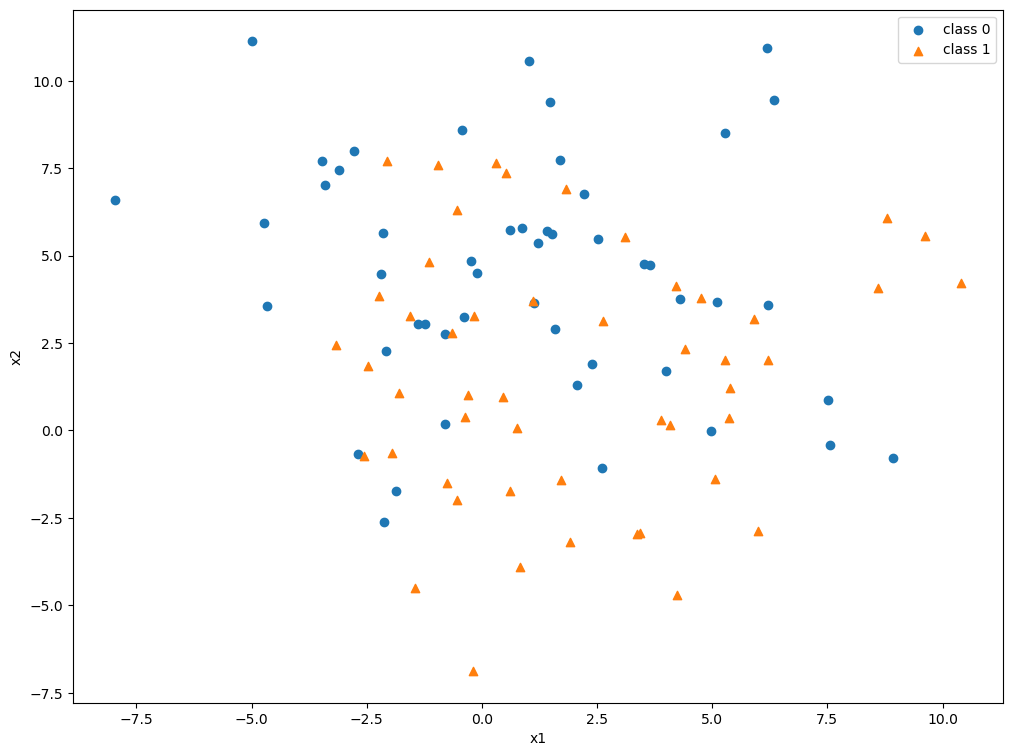

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o',
label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='^',
label="class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, stratify=y,random_state=10)

In [4]:
from sklearn.svm import SVC
model = SVC(kernel='linear').fit(X_train, y_train)
#model = SVC(kernel='rbf').fit(X_train, y_train)

In [5]:
# 클래스별 서포트의 개수(0 2개, 1 1개)
model.n_support_

array([32, 32])

In [6]:
# 서포트의 인덱스
model.support_

array([ 1,  6,  7,  8, 11, 18, 21, 22, 28, 33, 34, 36, 40, 43, 46, 47, 49,
       52, 54, 58, 60, 61, 62, 65, 68, 69, 70, 72, 73, 75, 76, 78,  0,  3,
        4,  5,  9, 12, 13, 17, 19, 24, 25, 26, 27, 29, 31, 32, 35, 39, 41,
       42, 44, 48, 51, 53, 56, 57, 59, 63, 67, 71, 74, 77])

In [7]:
# 서포트 벡터의 값
model.support_vectors_

array([[ 2.38446582,  1.90695201],
       [-0.80751256,  2.77052727],
       [-2.15786289,  5.65794607],
       [-0.8115479 ,  0.17157468],
       [ 1.13642489,  3.64864385],
       [-2.13098004, -2.62900031],
       [ 5.28228746,  8.5121168 ],
       [ 6.20554683,  3.5857334 ],
       [-0.11416378,  4.50036603],
       [ 6.34099733,  9.44654302],
       [-1.24385725,  3.03419325],
       [-2.1992742 ,  4.48559621],
       [ 1.7052325 ,  7.72202396],
       [ 8.92041126, -0.78649253],
       [ 7.51272304,  0.88331475],
       [ 0.6150041 ,  5.74088208],
       [ 5.10199858,  3.6740504 ],
       [ 2.60608862, -1.07306557],
       [ 4.96417247, -0.01810304],
       [-2.07151994,  2.2778135 ],
       [-2.6936653 , -0.66627545],
       [-4.72942414,  5.92352522],
       [-3.10175436,  7.45668003],
       [ 4.00179677,  1.70620976],
       [-0.37937378,  3.2457277 ],
       [-1.86974191, -1.73820178],
       [ 2.07200703,  1.31445224],
       [ 2.52979139,  5.47164747],
       [ 0.87763228,

In [8]:
import numpy as np
def plot_svc(model,ax=None):
    if ax==None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        # 그래프 그리드
        x = np.linspace(xlim[0], xlim[1], 30)
        y = np.linspace(ylim[0], ylim[1], 30)
        Y, X = np.meshgrid(y, x) # 정방행렬로 만들고
        xy = np.vstack([X.ravel(), Y.ravel()]).T #1차원으로 만들고행렬 전치
        #판별함수에 입력하고
        P = model.decision_function(xy).reshape(X.shape)
        # decision boundary와 margins
        # 등고선, 2차원 넘파이 배열
        ax.contour(X, Y, P,
        levels=[-1, 0, 1], colors='k',
        linestyles=['--', '-', '--'])
        # 서포트 벡터 그리기
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=200)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

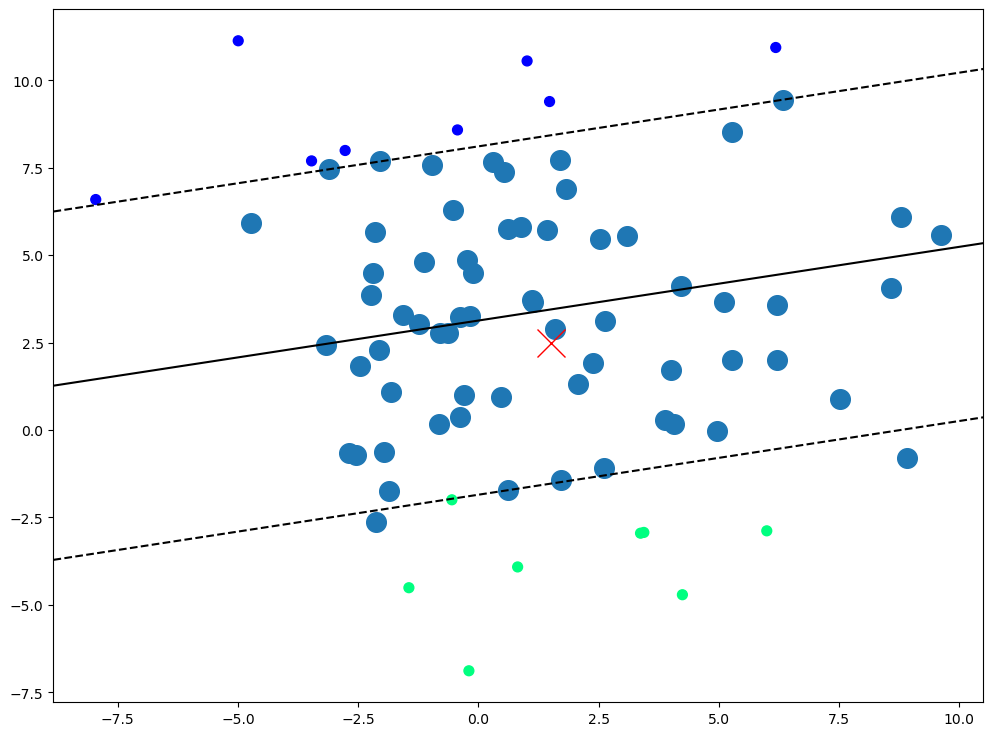

In [9]:
plt.figure(figsize=(12,9))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50,
cmap='winter')
# X_new 데이터는 어느 클래스로 분류될까요?
X_new = [1.5, 2.5]
plt.plot(X_new[0], X_new[1], 'x', color='red', markersize=20)
plot_svc(model)

In [10]:
model.predict([[1.5, 2.5]])

array([1])

In [11]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01,
0.001, 0.00001, 10]}

grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 1, 'gamma': 0.01}
Best Estimators:
 SVC(C=1, gamma=0.01)


In [12]:
model = grid.best_estimator_
model

SVC(C=1, gamma=0.01)

In [13]:
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.625
검증용: 0.9


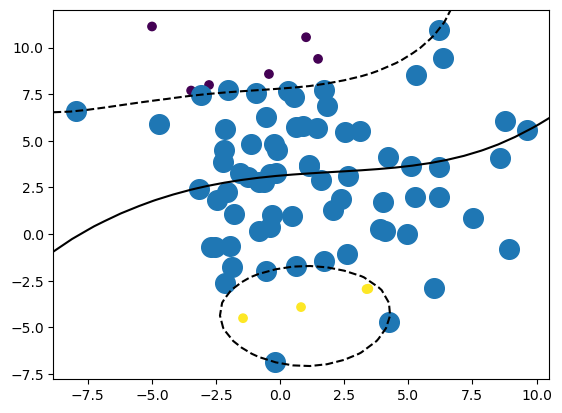

In [14]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plot_svc(model)

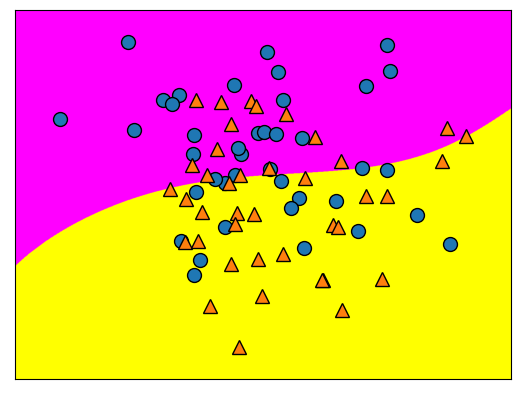

In [15]:
import mglearn
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
mglearn.plots.plot_2d_classification(model, X_train, cm='spring')